### Final
我们机器学习的课程也终于到了最后一站。前面的课程中我们讲了很多有监督、无监督和半监督的方法。  
我们从处理数据开始，讲了简单的线性模型，即线性回归和逻辑回归，并了解了如何用高维映射实现线性模型的非线性决策。为了得到更高效的非线性模型，我们学习了神经网络和核方法。摆脱代数模型，我们又学习了贝叶斯概率模型。通过提出一些可行的假设，我们有了朴素贝叶斯分类器和贝叶斯网络模型。再往后，为了使用多个高斯分布拟合数据分布，我们学习了优化有隐变量的概率模型的EM算法。  
无监督的部分，我们学习了最基本的聚类算法，包括K-means、密度和层次聚类。学习了如何实现无监督和有监督的降维，包括线性降维PCA和LDA，嵌入降维LLE和t-SNE，密度等度量降维Isomap和深度无监督模型自编码器。  
我们还学习了能降低偏差的adaboost方法，能降低方差的bagging方法。学习了能使用无标签数据帮助有监督学习的半监督学习方法。我们还学习了最基础的强化学习理论，并实现了井字棋的AI。  
这短暂的学习中我们学到了很多的知识，但这些知识只是皮毛中的皮毛，是真正意义上的"机器学习入门"。今天，能够成功落地的机器学习项目，并不仅仅是只靠我们学到的这些简单技巧就能实现的。今天的强大推荐系统，强大的计算机视觉目标检测，还有强大的翻译软件，它们都是机器学习的系统；但是每一个项目，背后都有着几乎一个知识领域，一套知识体系，和一个善于钻研的工程师团队。我说这些只是为了提醒大家，一定不要为学到了一些简单的知识就沾沾自喜，要永远抱着学徒的心，带着热情走向下一站。  
### AI?
我们现在已经可以自行开发机器学习系统来解决一些实际问题了。我们能实现一些事件的预测，一些模式的分类，还有数据的聚类等项目。但是这些好像和我们心目中的人工智能仍有差距，我们可能会认为，人工智能是能理解人类语言，模仿人类行为，并做到人类难以完成的工作的机器。所谓KNN、决策树分类器，好像只是代替人类进行一些简单的工作。  
但今天，我们似乎在强化学习的领域找到了通往真正的人工智能的大门。经过强化学习训练的AI，似乎已经可以做到人类做不到的事情。chat bot可以生成逼真的语言，GAN可以进行艺术创作，甚至有些AI可以在星际争霸上打赢人类玩家。这些工作都与强化学习分不开关系。  
我们之前实现的井字棋强化学习似乎已经能在完全没有训练资料的情况下学会下棋，甚至可以在不犯任何失误的时候找到人类的破绽。虽然井字棋这个游戏非常简单，对20000不到的状态空间，我们可以直接在蒙特卡洛树中搜索出最好决策，但是这依然体现了强化学习的潜力。
### 强化学习与深度学习
在之前的学习过程中，我们学习了表格型的Q-Learning，在表格型的Q-Learning方法的学习过程中，我们逐渐会形成一张表格。在许多简单的问题中，这种表格型的Q-Learning方法是比较实用的，但是当我们所处理的问题具有较大的状态集合动作集时，这种表格型的方法就显得十分的低效了。此时我们需要一种新的模型方法来处理这种问题，所以出现了结合了神经网络的Q-Learning方法，Deep Q-Learning(DQN),通过在探索的过程中训练网络，最后所达到的目标就是将当前状态输入，得到的输出就是对应它的动作值函数，也即$f(s)=Q(s,a)$ ,这个f就是训练的网络

### Deep Q learning
我们前面学习井字棋使用的学习方法是让机器对弈，产生一条情节(episode)链，然后从后向前遍历序列并更新Q值。每个状态的更新公式都决定于该步action的奖赏和后续一个状态的Q值。
$$ Q(x,a) = (1-\alpha)Q(x,a)+\alpha (R(x',a') + \gamma Q(x',a')) $$
使用神经网络来做deep的end to end Q学习时，这个问题就不是直接修改表，而是让模型做一个回归。回归使用的误差函数是MSE均方误差。就是把上面的公式计算出来的新Q值当作回归目标，计算网络输出和它的均方误差，然后用梯度方法更新一下就好了。  
![DQL-optimize.png](DQL-optimize.png)
想让DQL顺利跑起来，还需要一些其他的工程技巧。  
首先，我们在使用deep network拟合函数时，我们都是假定数据是独立同分布的，并在一个有一定规模的数据集上运行梯度下降优化网络。但是如果我们使用之前的方法，每进行一个对弈就用这个情节链去训练一次。先不说想让网络适应这个情节需要几次迭代更新，就算我们用很多次更新去让网络适应了这个经验，神经网络的特性也常常会出现在样本数过少时的过拟合。而且下一次我们再用这个网络去采样时，就会出现完全不同分布的采样轨迹，这个问题的性质是无法保证收敛的。  
为此，2013年最早的DQL论文提出的方法是用两个network，一个叫evaluate一个叫target。我们使用target网络去对弈多次，采样出多条对弈轨迹形成数据集(这个对弈次数大小自行调整)，再用这个数据集在evaluate网络上训练。这样的数据集是独立同分布的，网络不容易过拟合，而且训练震荡发散可能性降低，更加稳定。训练得差不多之后，我们再把evaluate网络的参数拷贝给target网络，然后进入下一个epoch。  
### 接水果
我们设计一个简单的接水果游戏来体现DQL与AI的工作逻辑，也许你觉得让AI学习井字棋太简单了，那么现在我们真正让AI来学习打电玩。  
接水果游戏的游戏界面为10x8，最上方每6个时间单位在随机位置出现水果，每个时间单位后水果下降一格，每个时间单位AI或玩家可以控制最下方的3宽度的盘子向左或向右移动一格。  
AI控制游戏的方式是通过向前看一步，评估当前时刻进行任何操作获得的预期奖励，并做出最好决策。为了避免AI在探索游戏世界的过程中只探索当前模型给出的最优路径，导致泛化性不足；我们也会设置一些比较小的噪声，按照指数分布去选择优先级低一些的操作。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import Dataset
import torch.utils.data as Data
import random
from collections import Counter

In [2]:
def get_init_game():
    '''
    得到初始游戏画面
    '''
    game = torch.zeros((10,8))
    game[9,3:6] = 1.
    return (game,0)
    
def elapse(game,t,action):
    '''
    在game的游戏画面上推移一个时间单位，根据是action和t
    action可以是-1,0,1，代表向左，不动和向右
    如果t是8的倍数在游戏画面最上方产生新的水果
    水果下移一个像素，如果水果被接到就得到1 reward
    反之如果没能接到就获得-1 的reward
    界面上的0为空地，1为天上的水果或地上的盘子，
    2为落在盘子里的水果，3为落在地上的水果
    '''
    game = game.clone()
    reward = 0.
    # 检测地上有没有烂水果
    game[9][torch.where(game[9]==2)] = 1
    game[9][torch.where(game[9]==3)] = 0
    # 根据action移动盘子
    if action==-1:
        game[9][0:7] = game[9][1:8].clone()
        game[9][7] = 0
    elif action==1:
        game[9][1:8] = game[9][0:7].clone()
        game[9][0] = 0
    # 判断果子落地与否，落到盘子上
    if 1 in game[8]:
        fruit = torch.where(game[8]==1)
        if game[9][fruit] != 1:
            reward = -1.
            game[9][fruit] = 3
        else:
            reward = 1.
            game[9][fruit] = 2
        
    # 画面下移一个像素
    game[1:9] = game[0:8].clone()
    game[0] = 0
    # 如果经过了8个时间，就随机生成果子
    if t%8==0:
        #torch.seed = t
        idx = torch.randint(low = 0, high = 8, size = (1,))
        game[0][idx] = 1.
    t+=1
    return game,t,reward

def successors(game,t):
    '''
    返回一个列表，列表元素是(game,t,reward)3元组
    '''
    ret = []
    # 不动
    ret.append(elapse(game,t,0))
    # 左
    if game[9][0]==0:
        ret.append(elapse(game,t,-1))
    # 右
    if game[9][-1]==0:
        ret.append(elapse(game,t,1))
    return ret

def poisson(n, lamda = 1):
    '''
    指数分布，随机生成0~n-1的整数，服从指数分布
    '''
    probs = np.exp(-lamda*np.array(range(n+1)))
    probs /= probs.sum()
    for k in range(n):
        p = probs[k]/probs[k:].sum()
        if random.random()<p:
            return k
    return random.choice(range(n))

def policy(model, game, t, lamda):
    succ = successors(game, t)
    imgs = [x[0].unsqueeze(0).unsqueeze(0) for x in succ]
    imgs = torch.cat(imgs,axis = 0)
    values_pred = model(imgs.to("cuda")).view(-1)
    #print(values_pred)
    rank = torch.argsort(-values_pred)
    # 使用lamda系数的指数分布，从最好到最坏随机选择下一步
    i = poisson(len(rank),lamda)
    #print(values_pred[i])
    return succ[rank[i]]

def episode(model, lamda):
    '''
    生成一整条情节链
    '''
    score = 0
    game,t = get_init_game()
    
    games = []
    rewards = []
    # 这里预设情节链不超过一千帧
    for _ in range(1000):
        game,t,reward = policy(model, game, t, lamda)
        rewards.append(reward)
        games.append(game.unsqueeze(0).unsqueeze(0))
        if reward==-1:
            break
        score += reward
    return games,rewards,score

### 模型
使用卷积神经网络，为了不丢失边缘特征，使用两层3x3，1步长，1填充的卷积层。后接池化层和全连接层用于回归。事实上如果我们神经网络的输入可以不是一张图片，也可以是连续的n个时间单位的n张图片，这样的设计允许网络学习到时序的信息(比如在自动驾驶中，AI通过接收连续的几个帧就能分析出当前车辆的运行速度)，但我们这个游戏是很符合MDP假设的游戏，一般来说只看一帧就可以做出决策，所以这里并没有使用这种输入。

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 输入:nx1x10x8张量
        self.conv1 = nn.Conv2d(1, 8, 3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        # nx16x10x8张量
        self.maxpool = nn.MaxPool2d(2,2)
        # nx16x5x4张量
        self.fc = nn.Sequential(
            nn.Linear(16*5*4, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
        )
        

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

### 优化方法与采样
模型训练使用随机梯度下降，损失函数使用均方误差。均方误差很容易理解，因为我们的问题本质上是回归问题，MSE是很好的回归用损失函数。使用SGD而不用adam等更先进的优化器的原因是，adam等优化器使用动量，它的使用强烈依赖于独立同分布假设。而我们使用agent玩游戏得到的采样来训练模型，这个采样又和target model有绝对的相关性。如果我们使用动量则很有可能把之前的错误优化方向扩大化，让训练不收敛。  
如何采样事实上也是有讲究的，我们当然可以就让target model不断尝试玩游戏，并且把所有的录像带都用于训练。但是有一点很重要，就是样本的平衡与否。我们最开始的尝试，会得到一些完全接不到水果的录像，也会得到一些偶然接到水果的录像，然后我们会用这些录像带训练，逐渐的AI变得不那么容易完全接不到。这时我们认为"完全接不到"这个事件已经训练到收敛了，因此就没有用完全接不到的录像带再去train模型的意义。如果我们仍然保留这些完全接不到的录像带，则会让模型得到错误的收敛方向。我们应该尽可能使用走得更远的，分数更高的录像带来训练模型。所以我们虽然会进行采样，但是这个采样需要有选择性，我们应该重视表现得更好的录像，而适当抛弃表现一般的录像。

In [4]:
LR = 0.002

eval_model = Net().to("cuda")
target_model = Net().to("cuda")

loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(eval_model.parameters(), lr=LR)

In [5]:
replays = []
# 采样，保证样本平衡
while(len(replays)<50):
    tpl = episode(target_model, 1)
    if tpl[2]==0:
        replays.append(tpl)

while(len(replays)<100):
    tpl = episode(target_model, 1)
    if tpl[2]!=0:
        replays.append(tpl)
        
random.shuffle(replays)

def train(discount = 0.9, num_iters = 10, lamda = 2):
    # 产生新的情节链
    games,rewards,score = replays.pop(0)
    avg_score = sum(tpl[2] for tpl in replays)/100
    lamdas = [2**(i) for i in torch.linspace(3,0,11)]
    for lamda in lamdas:
        # 尽可能让本次采样的情节链得到的score>=当前score的平均值
        # 保证训练样本是尽可能优秀的样本，才能让模型不在训练中退化
        # 试想，如果模型一直接收它的失败经历，则训练是低效的
        tpl = episode(target_model, lamda)
        if tpl[2]>=avg_score:
            replays.append(tpl)
            break
    while(len(replays)<100):
        tpl = episode(target_model, 2)
        replays.append(tpl)
    
    running_loss = 0.
    running_score = 0.
    for step in range(num_iters):
        # 随机选择一个录像进行训练
        i = random.randint(0,49)
        games,rewards,score = replays[i]
        running_score += score
        rewards = torch.tensor(rewards).view(-1,1).cuda()
        games = torch.cat(games,axis = 0).cuda()
        Q_target = torch.zeros_like(rewards).cuda()
        
        # 计算Q_target(s) = gamme*Q(s')+reward
        with torch.no_grad():
            Q_target[:-1] = discount*target_model(games[1:])
        Q_target += rewards
        optimizer.zero_grad()
        output = eval_model(games)
        loss = loss_func(output,Q_target)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    
    target_model.load_state_dict(eval_model.state_dict())
    return score,running_loss/num_iters

### 训练
我们使用上面的方法，训练10k个epoch，每个epoch内我们使用target model玩很多次游戏，并选择一个表现较好的录像带加入records队列。训练时，我们从队列中随机选择一个录像带训练，重复10次。  
训练中观察到，损失值会随着训练的次数增加而减小，说明训练是收敛的。随着训练次数增加，模型在游戏上取得的分数也会增加，虽然有波动，但总体呈上升趋势。当然，因为玩每局游戏都能走得更远，越往后训练单个epoch需要的时间也越长。

Epoch   200, loss:  0.105, score: 2.06.
Epoch   400, loss:  0.122, score: 3.53.
Epoch   600, loss:  0.122, score: 4.16.
Epoch   800, loss:  0.122, score: 4.34.
Epoch  1000, loss:  0.119, score: 5.16.
Epoch  1200, loss:  0.110, score: 8.65.
Epoch  1400, loss:  0.115, score: 12.30.
Epoch  1600, loss:  0.103, score: 10.51.
Epoch  1800, loss:  0.090, score: 9.11.
Epoch  2000, loss:  0.071, score: 16.80.
Epoch  2200, loss:  0.073, score: 12.28.
Epoch  2400, loss:  0.051, score: 14.52.
Epoch  2600, loss:  0.055, score: 16.41.
Epoch  2800, loss:  0.051, score: 16.34.
Epoch  3000, loss:  0.043, score: 27.86.
Epoch  3200, loss:  0.054, score: 21.86.
Epoch  3400, loss:  0.051, score: 10.62.
Epoch  3600, loss:  0.043, score: 18.92.
Epoch  3800, loss:  0.040, score: 13.55.
Epoch  4000, loss:  0.035, score: 13.74.
Epoch  4200, loss:  0.040, score: 14.37.
Epoch  4400, loss:  0.028, score: 22.42.
Epoch  4600, loss:  0.029, score: 55.03.
Epoch  4800, loss:  0.019, score: 70.56.
Epoch  5000, loss:  0.0

Text(0,0.5,'MSEloss')

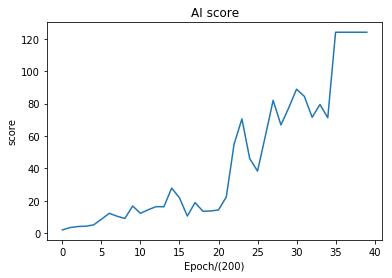

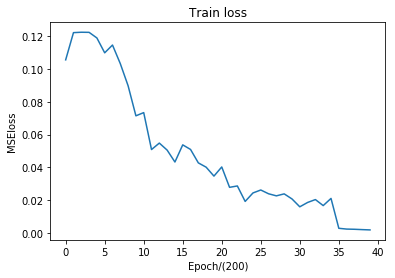

In [6]:
EPOCH = 10000
avg_score = 0
avg_loss = 0
step = 200

score_list = []
loss_list = []

for epoch in range(EPOCH):
    score,loss = train(discount = 0.85, num_iters = 10, lamda = 3)
    avg_score+=score
    avg_loss+=loss
    if (epoch+1)%step==0:
        avg_loss/=step
        avg_score/=step
        score_list.append(float(avg_score))
        loss_list.append(float(avg_loss))
        print("Epoch %5d, loss: %6.3f, score: %.2f."%(epoch+1,avg_loss,avg_score))
        avg_loss=0
        avg_score=0
    # 因为我们预设了episode不会超过1k帧，即最大的score为124
    # 如果avg_score已经达到124很久则可以认为收敛
    if len(score_list)>5 and score_list[-5]>=124:
        break

plt.figure()
plt.title('AI score')
plt.plot(score_list)
plt.xlabel('Epoch/(200)')
plt.ylabel('score')


plt.figure()
plt.title('Train loss')
plt.plot(loss_list)
plt.xlabel('Epoch/(200)')
plt.ylabel('MSEloss')

In [7]:
torch.save(target_model.state_dict(),'fruit-ai.cpk')

In [6]:
target_model.load_state_dict(torch.load('fruit-ai.cpk'))

<All keys matched successfully>

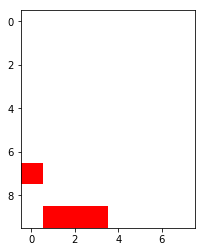

In [8]:
import time
from matplotlib.colors import ListedColormap
 
cmap_light = ListedColormap(['white', 'black', 'yellow', 'red'])
from IPython import display

games,rewards,score = episode(target_model, 5)
print("Score:",score)


for i in range(len(games)):
    plt.figure()
    img = games[i]
    img = img.squeeze()
    img = img.numpy()
    plt.imshow(img, cmap=cmap_light)
    plt.show()
    display.clear_output(wait=True)